## Conjunto de datos de marketing bancario:

> Los datos están relacionados con campañas de marketing directo (llamadas telefónicas) de una institución bancaria portuguesa.<br>
El objetivo de la clasificación es predecir si el cliente suscribirá un depósito a plazo (variable y).

|Header |  Definition|
|---|---------|
|`Age`|Edad del cliente|
|`Job` |trabajo del cliente|
|`Martial` | Estado civil del cliente|
|`Education` |Nivel de educación del cliente|
|`Default` | ¿Tiene el crédito en mora?|
|`Housing` | Si el cliente tiene préstamo de vivienda|
|`Loan` | Tiene Préstamo Personal|
|`Balance` | Saldo individual del cliente|
|`Contact` | Tipo de comunicación|
|`Month` | Último mes de contacto del año|
|`Day` | Último día de contacto de la semana|
|`Duration` | Duración del último contacto, en segundos|
|`Campaign` | Número de contactos realizados durante esta campaña y para este cliente|
|`Pdays` | Número de días que pasaron desde la última vez que se contactó al cliente de una campaña anterior|
|`Previous` | Número de contactos realizados antes de esta campaña y para este cliente|
|`Poutcome` | resultado de la campaña de marketing anterior|
|`Y` | ¿El cliente ha suscrito un depósito a plazo?|

+ Importar las librerias necesarias

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

+ Importar el conjunto de datos

In [ ]:
datos = pd.read_csv("./Data/bank_full.csv", sep= ",")
datos.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
16997,25,admin.,single,secondary,no,0,no,yes,cellular,25,jul,49,1,-1,0,unknown,no
11493,50,blue-collar,married,unknown,no,1389,yes,no,unknown,19,jun,162,3,-1,0,unknown,no
19946,48,management,married,secondary,no,4415,yes,no,cellular,8,aug,148,6,-1,0,unknown,no
21010,59,technician,married,secondary,no,316,no,no,cellular,14,aug,200,4,-1,0,unknown,no
43709,32,student,single,unknown,no,376,no,no,cellular,13,may,457,2,178,3,failure,no


In [4]:
print(datos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


### Realiza el análisis descriptivo y gráfico del conjunto de datos

### Análisis Descriptivo
Considera al menos los siguientes puntos:
> + Qué tipos de datos maneja el conjunto?
> + Cuantos valores distintos tiene por variable categorica?
> + el conjunto de datos posee nulos?, cuantos?

1. Qué tipos de datos maneja el conjunto?
Tipos de datos:
> + Variables numéricas: age, balance, day, duration, campaign, pdays, previous.
> + Variables categóricas: job, marital, education, default, housing, loan, contact, month, poutcome, y.

In [5]:
# Tipos de datos de cada columna
data_types = datos.dtypes
print(data_types)

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


2. Cuantos valores distintos tiene por variable categorica?
> + job: 12 categorías (diferentes tipos de trabajos).
> + marital: 3 categorías (estado civil).
> + education: 4 categorías (nivel educativo).
> + default: 2 categorías (si tiene o no crédito en incumplimiento).
> + housing: 2 categorías (si tiene o no préstamo de vivienda).
> + loan: 2 categorías (si tiene o no otro tipo de préstamo).
> + contact: 3 categorías (tipo de contacto).
> + month: 12 categorías (mes en que se realizó el contacto).
> + poutcome: 4 categorías (resultado de campañas anteriores).
> + y: 2 categorías (resultado de la campaña: "sí" o "no").

In [6]:
# Número de valores únicos por cada variable categórica
categorical_columns = datos.select_dtypes(include=['object']).columns
unique_values_per_categorical = datos[categorical_columns].nunique()
print(unique_values_per_categorical)

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
y             2
dtype: int64


3. el conjunto de datos posee nulos?, cuantos?
> + No hay valores nulos en ninguna de las columnas.

In [7]:
# Presencia de valores nulos
null_values = datos.isnull().sum()
print(null_values)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


4. ¿Cuál es la tasa de éxito de la campaña en términos de suscripción al depósito a plazo (y)?

Tasa de éxito de la campaña en términos de suscripción al depósito a plazo:

> + No (Clientes que no suscribieron): 88.30%.
> + Yes (Clientes que suscribieron): 11.70%.

Esto indica que la tasa de éxito de la campaña fue relativamente baja, con solo el 11.7% de los clientes aceptando el depósito a plazo.

In [8]:
# Tasa de éxito de la campaña (suscripción a depósito a plazo)
subscription_rate = datos['y'].value_counts(normalize=True) * 100  # en porcentaje
print(subscription_rate)

y
no     88.30152
yes    11.69848
Name: proportion, dtype: float64


### Análisis Gráfico
Considera al menos los siguientes gráficos:
> + Gráfico de cajas
> + Histograma
> + Gráfico de correlacion

### 1. Gráfico de cajas

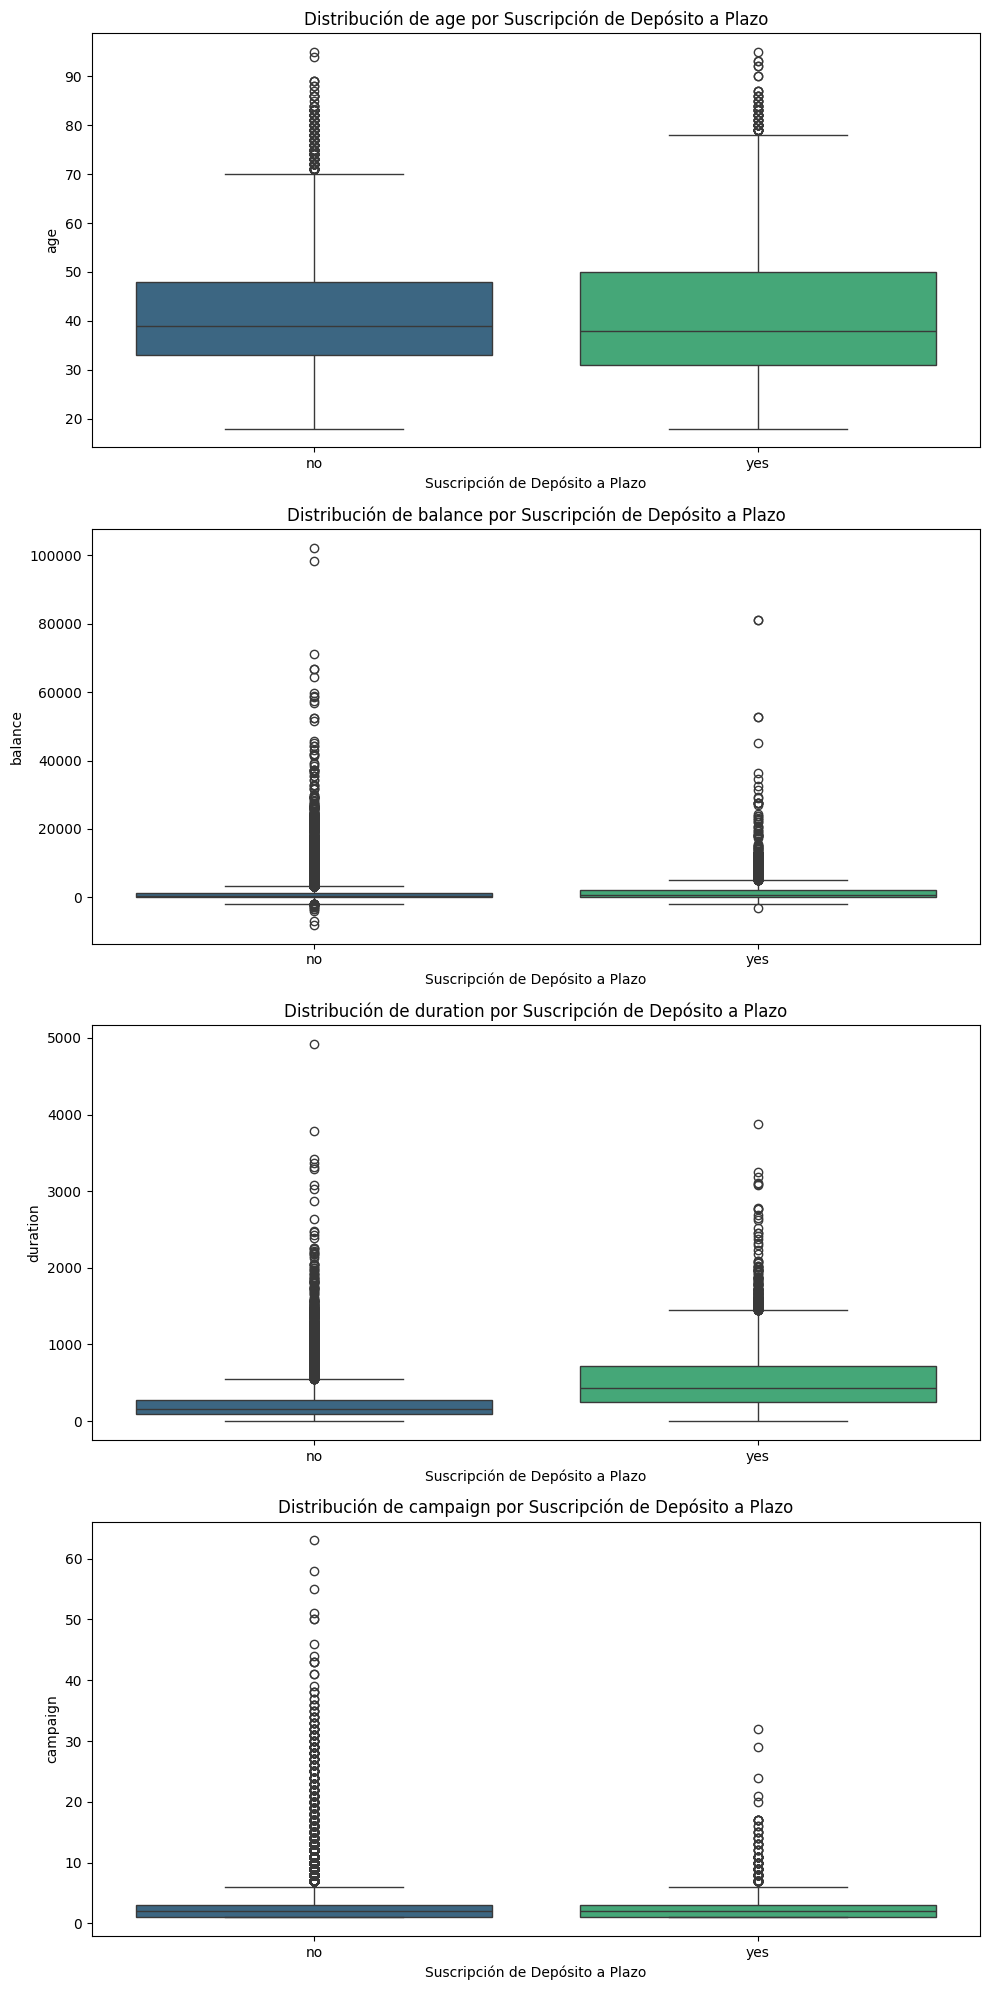

In [9]:
# Selección de columnas numéricas
num_vars = ['age', 'balance', 'duration', 'campaign']
# Gráfico de cajas
fig, axs = plt.subplots(len(num_vars), 1, figsize=(10, 5*len(num_vars)))
axs = axs.flatten()

# Crear los gráficos de caja para las variables numéricas
for i, col in enumerate(num_vars):
    sns.boxplot(x="y", y=col, data=datos, ax=axs[i], hue="y", palette="viridis")
    axs[i].set_title(f'Distribución de {col} por Suscripción de Depósito a Plazo')
    axs[i].set_xlabel('Suscripción de Depósito a Plazo')
    axs[i].set_ylabel(col)

# Ajustar los subplots y mostrar la figura
fig.tight_layout()
plt.show()

### 2. Histograma

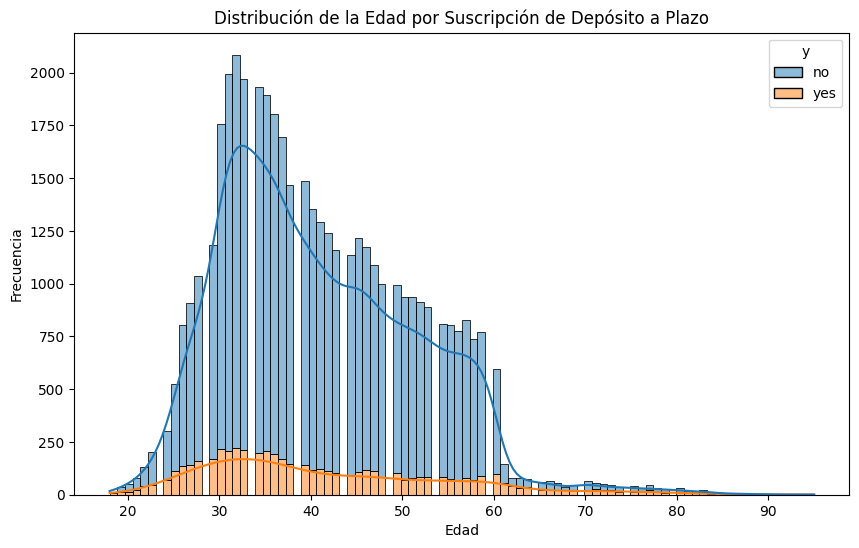

In [10]:
# Histograma para visualizar la suscripción a depósitos según la edad
plt.figure(figsize=(10, 6))
sns.histplot(data=datos, x="age", hue="y", multiple="stack", kde=True)
plt.title('Distribución de la Edad por Suscripción de Depósito a Plazo')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

### 3. Gráfico de correlación

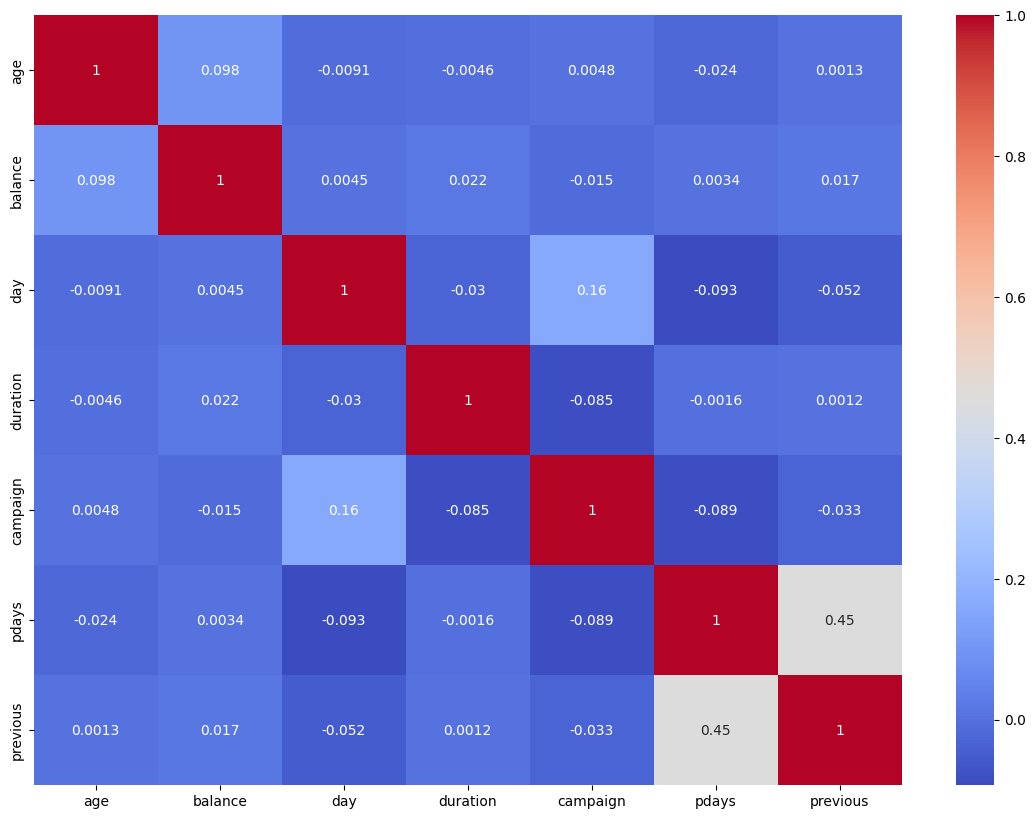

In [11]:
# Filtrar solo las columnas numéricas
datos_numericos = datos.select_dtypes(include=[np.number])

# Gráfico de correlación
fig, axs = plt.subplots(figsize=(14, 10))
correlacion = datos_numericos.corr()
sns.heatmap(correlacion, annot=True, cmap="coolwarm", ax=axs)
plt.show()

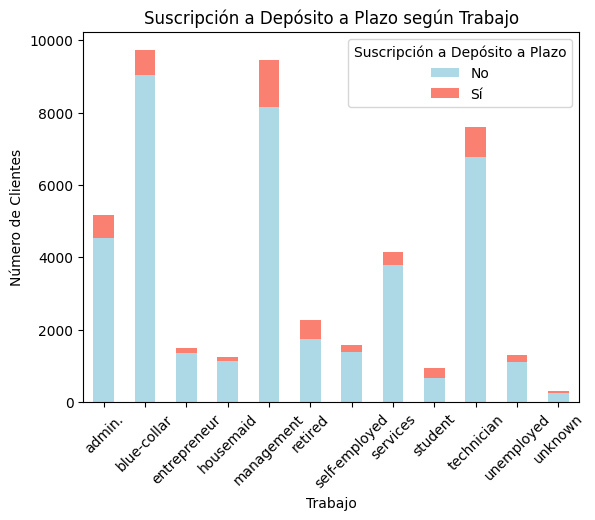

In [12]:
# Gráfico de barras apiladas para visualizar la suscripción a depósitos según el trabajo
job_counts = datos.groupby(['job', 'y']).size().unstack()
job_counts.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'])
plt.title('Suscripción a Depósito a Plazo según Trabajo')
plt.xlabel('Trabajo')
plt.ylabel('Número de Clientes')
plt.legend(title='Suscripción a Depósito a Plazo', labels=['No', 'Sí'])
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='y', ylabel='count'>

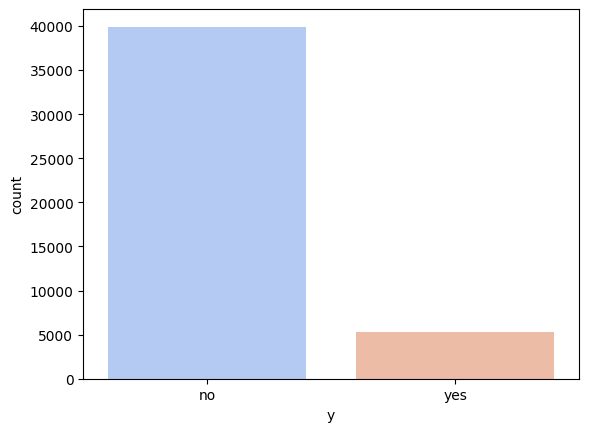

In [13]:
# Visualizar la distribución de la variable objetivo
sns.countplot(x="y", data=datos, palette="coolwarm")

### Preprocesamiento
>- Remover null (si aplica)
>- Encoding
>- Division de variables x (atributos) - y (objetivo)

In [14]:
# Remover null (si aplica)
print(datos.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [15]:
# Convertir la variable objetivo 'y' en numérica (yes -> 1, no -> 0)
y = datos["y"].apply(lambda x: 1 if x == "yes" else 0)

In [16]:
# Encoding de variables categóricas
# Crear instancia de OneHotEncoder
onehot_encoder = OneHotEncoder(drop='first')

# Lista de columnas categóricas
categorical_cols = [col for col in datos.columns if datos[col].dtype == 'object' and col != 'y']

# Ajustar y transformar los datos
onehot_encoded = onehot_encoder.fit_transform(datos.loc[:, categorical_cols]).toarray()

# Crear un nuevo DataFrame con los datos codificados
x_onehot_encoded = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(input_features=categorical_cols))

In [17]:
# Crear el conjunto de características (X)
x = datos[datos.columns[~datos.columns.isin(categorical_cols)]].drop(["y"], axis=1)

# Concatenar las columnas numéricas originales con las columnas codificadas
x = pd.concat([x, x_onehot_encoded], axis=1)

### Oversamplig
aplicar las siguientes técnicas:
> - SMOTE
> - ADASYN

In [18]:
print("Distribución original de clases:")
print(y.value_counts())

Distribución original de clases:
y
0    39922
1     5289
Name: count, dtype: int64


In [19]:
# Crear una instancia de SMOTE
smote = SMOTE(random_state=42, sampling_strategy=0.9, k_neighbors=10)

# Aplicar SMOTE
X_resampled, y_resampled = smote.fit_resample(x, y)

In [20]:
print("Distribución de clases después de SMOTE:")
print(y_resampled.value_counts())

Distribución de clases después de SMOTE:
y
0    39922
1    35929
Name: count, dtype: int64


<Axes: xlabel='y', ylabel='count'>

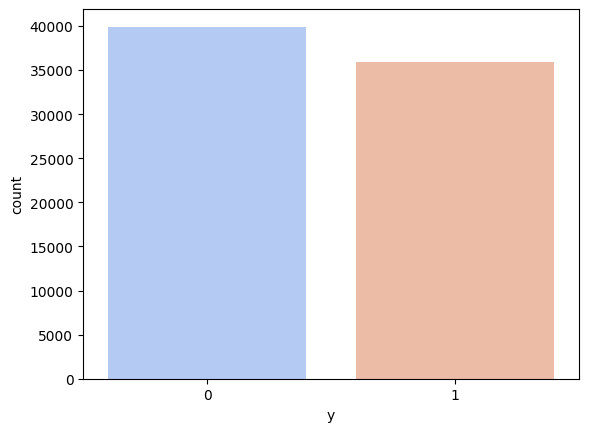

In [21]:
# Verificar si la distribución de la variable objetivo ha cambiado después de aplicar SMOTE
sns.countplot(x=y_resampled, palette="coolwarm")

In [ ]:
pd.concat([X_resampled, y_resampled]).to_csv('smote_bank_full.csv')

In [23]:
# Crear una instancia de ADASYN
adasyn = ADASYN(random_state=42, sampling_strategy=0.5, n_neighbors=10)

# Aplicar ADASYN
X_resampled_adasyn, y_resampled_adasyn = adasyn.fit_resample(x, y)

In [24]:
print("Distribución de clases después de ADASYN:")
y_resampled_df = pd.Series(y_resampled_adasyn)
print(y_resampled_df.value_counts())

Distribución de clases después de ADASYN:
y
0    39922
1    20009
Name: count, dtype: int64


<Axes: xlabel='y', ylabel='count'>

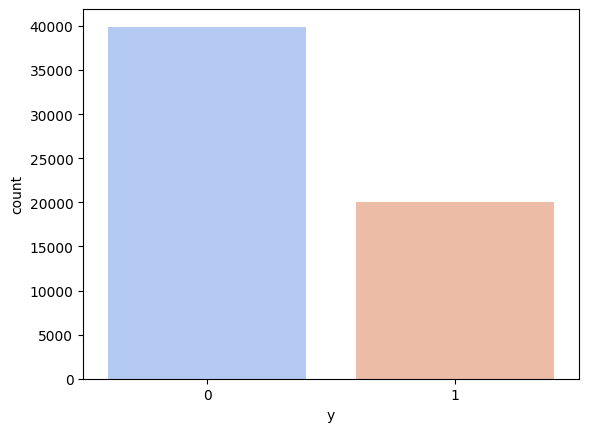

In [25]:
# Verificar si la distribución de la variable objetivo ha cambiado después de aplicar ADASYN
sns.countplot(x=y_resampled_adasyn, palette="coolwarm")

In [ ]:
pd.concat([X_resampled_adasyn, y_resampled_adasyn]).to_csv('adasyn_bank_full.csv')